In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pymc3 as pm

%matplotlib inline

In [2]:
df = pd.read_csv('./data/all_stocks_5yr.csv.zip', compression='zip')
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM


In [3]:
stocks = ['MSFT', 'AAPL', 'GOOG', 'NEM', 'ALB']
df_stocks = df.loc[df.Name.isin(stocks), ['Date', 'Close', 'Name']]
df_stocks.shape

(6290, 3)

In [4]:
df_stocks = df_stocks.pivot(index='Date', columns='Name', values='Close')
df_stocks.head()

Name,AAPL,ALB,GOOG,MSFT,NEM
Date,,,,,
2012-08-13,90.00,61.07,329.67,30.39,46.92
2012-08-14,90.24,60.44,334.00,30.13,46.34
2012-08-15,90.12,60.87,333.44,30.20,46.63
2012-08-16,90.91,61.20,336.10,30.78,47.59
2012-08-17,92.59,61.31,338.23,30.90,47.16


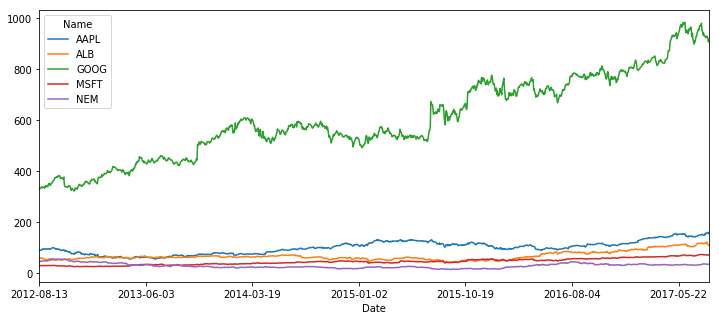

In [5]:
df_stocks.plot(figsize=(12, 5))
plt.show()

In [6]:
y_mean = df_stocks.mean()
y_std = df_stocks.std()
df_stocks = (df_stocks - y_mean) / y_std

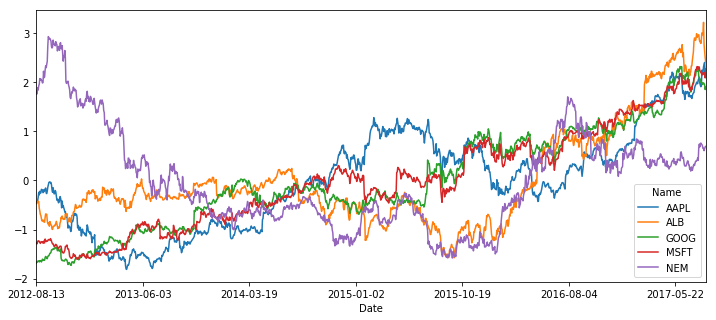

In [7]:
df_stocks.plot(figsize=(12, 5))
plt.show()